In [9]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
base_insurance = pd.read_csv('../ArquivosBase/InsuranceCorrigido.csv')


In [11]:
base_insurance

,age,sex,bmi,children,smoker,region,charges
0,54,female,47.410,0,yes,southeast,63770
1,45,male,30.360,0,yes,southeast,62592
2,52,male,34.485,3,yes,northwest,60021
3,31,female,38.095,1,yes,northeast,58571
4,33,female,35.530,0,yes,northwest,55135
...,...,...,...,...,...,...,...
1333,18,male,34.100,0,no,southeast,1137
1334,18,male,33.660,0,no,southeast,1136
1335,18,male,33.330,0,no,southeast,1135
1336,18,male,30.140,0,no,southeast,1131


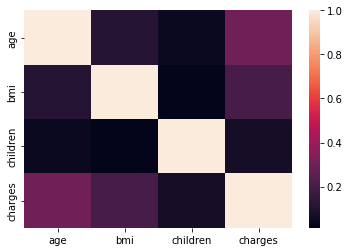

In [12]:
sns.heatmap(base_insurance.corr());

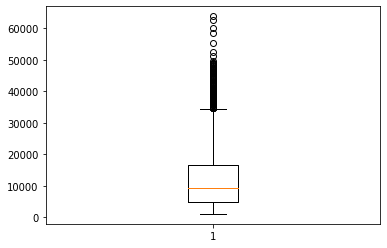

In [13]:
plt.boxplot(base_insurance['charges'])
plt.show()

In [14]:
''' Detection '''
# IQR
Q1 = np.percentile(base_insurance['charges'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(base_insurance['charges'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", base_insurance.shape)
 
upper = np.where(base_insurance['charges'] >= (Q3+1.5*IQR))
lower = np.where(base_insurance['charges'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
base_insurance.drop(upper[0], inplace = True)
base_insurance.drop(lower[0], inplace = True)
 
print("New Shape: ", base_insurance.shape)

Old Shape:  (1338, 7)
New Shape:  (1198, 7)


C:\Users\vitao\AppData\Local\Temp\ipykernel_11612\1010945882.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(base_insurance['charges'], 25,
C:\Users\vitao\AppData\Local\Temp\ipykernel_11612\1010945882.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(base_insurance['charges'], 75,


In [15]:
one_hot_encoder = OneHotEncoder()

In [16]:
X_base = base_insurance.drop('charges', axis='columns')
X_base.head()

,age,sex,bmi,children,smoker,region
140,19,female,33.110,0,yes,southeast
141,18,male,31.680,2,yes,southeast
142,24,male,31.065,0,yes,northeast
143,23,female,31.400,0,yes,southwest
144,22,female,30.400,0,yes,northwest


In [17]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['sex','smoker','region']),
     remainder='passthrough')

In [18]:
X_base = column_trans.fit_transform(X_base)
X_base

array([[ 1.   ,  0.   ,  0.   , ..., 19.   , 33.11 ,  0.   ],
       [ 0.   ,  1.   ,  0.   , ..., 18.   , 31.68 ,  2.   ],
       [ 0.   ,  1.   ,  0.   , ..., 24.   , 31.065,  0.   ],
       ...,
       [ 0.   ,  1.   ,  1.   , ..., 18.   , 33.33 ,  0.   ],
       [ 0.   ,  1.   ,  1.   , ..., 18.   , 30.14 ,  0.   ],
       [ 0.   ,  1.   ,  1.   , ..., 18.   , 23.21 ,  0.   ]])

In [19]:
y_base = base_insurance.iloc[:,6]
y_base

140     34439
141     34303
142     34254
143     34166
144     33907
        ...  
1333     1137
1334     1136
1335     1135
1336     1131
1337     1121
Name: charges, Length: 1198, dtype: int64

In [20]:
X_base_treinamento, X_base_teste, y_base_treinamento, y_base_teste = train_test_split(X_base, y_base,test_size=0.3, random_state=1)


In [21]:
print(f'Treinamento X: {X_base_treinamento.shape}')
print(f'Treinamento Y: {y_base_treinamento.shape}')
print(f'Teste X: {X_base_teste.shape}')
print(f'Teste Y: {y_base_teste.shape}\n')

Treinamento X: (838, 11)
Treinamento Y: (838,)
Teste X: (360, 11)
Teste Y: (360,)



In [22]:
regressao = LinearRegression()

In [23]:
resultado = regressao.fit(X_base_treinamento, y_base_treinamento)
resultado

LinearRegression()

In [24]:
print(f'B0: {resultado.intercept_}')
print(f'B1: {resultado.coef_}')
print(f'Accuracy: {resultado.score(X_base_treinamento,y_base_treinamento)*100}')

B0: 3172.7303931705164
B1: [  210.35994443  -210.35994443 -7017.98410916  7017.98410916
   857.21591143   427.71902596  -363.78537495  -921.14956243
   253.68051419    59.52739813   440.71324268]
Accuracy: 61.197701836205596


In [25]:
previsao = regressao.predict(X_base_teste)
print(f'Mean Absolute: {mean_absolute_error(y_base_teste, previsao)}')
print(f'Mean Squared: {mean_squared_error(y_base_teste, previsao)}')

Mean Absolute: 2677.498215070583
Mean Squared: 22316305.200435862


In [26]:
previsao

array([11934.29437046, 10896.56023718, 12102.75667709, 15984.48002109,
        4323.20881473,  5560.18471843, 19557.1851611 ,  2923.00478265,
        7349.61373919, 12856.42148489,  4704.42348481, 24241.20564931,
        8519.15636399,  2538.25403729,  2754.4316527 ,  7522.67647124,
        7908.7894841 ,  4424.4697354 , 12056.82085706,  2247.7374342 ,
        4814.91183125, 12061.95750916,  2945.3756401 , 10912.21824905,
       12686.67543498,  4961.14539181, 11793.55396649, 13321.55377387,
        6098.48132389, 14122.21034583,  3171.81251175, 12178.90007125,
        5611.00359049,  9950.64040841,  7345.26056019,  6321.22626101,
       10537.26681913, 14084.05444578, 12794.827653  ,  9472.20198824,
        9033.86368608,  2846.27890943,  9928.20759342,  8385.45177974,
       13359.8490424 , 10147.29068079,  7352.1313085 ,  5150.37749496,
        6521.69151646,  8072.723081  ,  2883.41906289,  6446.86876636,
        3679.34860374,  7355.59235915, 11519.98275217, 15528.04369335,
      

In [27]:
df = pd.DataFrame(y_base_teste)
df['Previsto'] = np.round(previsao,2)
df.rename(columns = {'charges' : 'Objetivo'}, inplace = True)
df

,Objetivo,Previsto
604,10381,11934.29
742,8334,10896.56
627,9964,12102.76
329,17081,15984.48
1158,2842,4323.21
...,...,...
999,4753,7059.98
1335,1135,2130.90
145,33900,17619.67
1260,1877,2947.66


In [28]:
grafico1 = px.scatter(df, x="Objetivo", y="Previsto",
                title="Preço Casas")
grafico1.show()

In [29]:
import plotly.offline as po


In [30]:

fig = go.Figure() 
fig.add_trace(
    go.Scatter(
        x=df['Objetivo'],
        y=df['Previsto'],
        mode='markers',
        marker=dict(
            color=(
                (df['Objetivo'] / df['Previsto'] > 1.50)
            ).astype('int'),
            colorscale=[[0, 'blue'], [1, 'red']]
        )
    )
)
fig.update_layout(
    title="Preço Previsto das Casas",
    xaxis_title="Objetivo",
    yaxis_title="Previsto",
    legend_title="Gráfico de Casas",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()